Muhammad Fawwaz Fauzan

5312422032

Teknik Komputer

In [10]:
# install modul scikit-dsp-comm
!pip install scikit-dsp-comm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.5/90.5 kB 1.5 MB/s eta 0:00:00


In [11]:
# Memuat modul-modul yang diperlukan dan menampilkan plot secara langsung di notebook
%pylab inline

# Mengimpor modul-modul yang diperlukan dari sk_dsp_comm package
import sk_dsp_comm.sigsys as ss
import sk_dsp_comm.fir_design_helper as fir_d
import sk_dsp_comm.iir_design_helper as iir_d
import sk_dsp_comm.multirate_helper as mrh

# Mengimpor modul scipy.signal sebagai signal
import scipy.signal as signal

# Mengimpor fungsi Audio dan display dari IPython.display
from IPython.display import Audio, display
from IPython.display import Image, SVG

Populating the interactive namespace from numpy and matplotlib


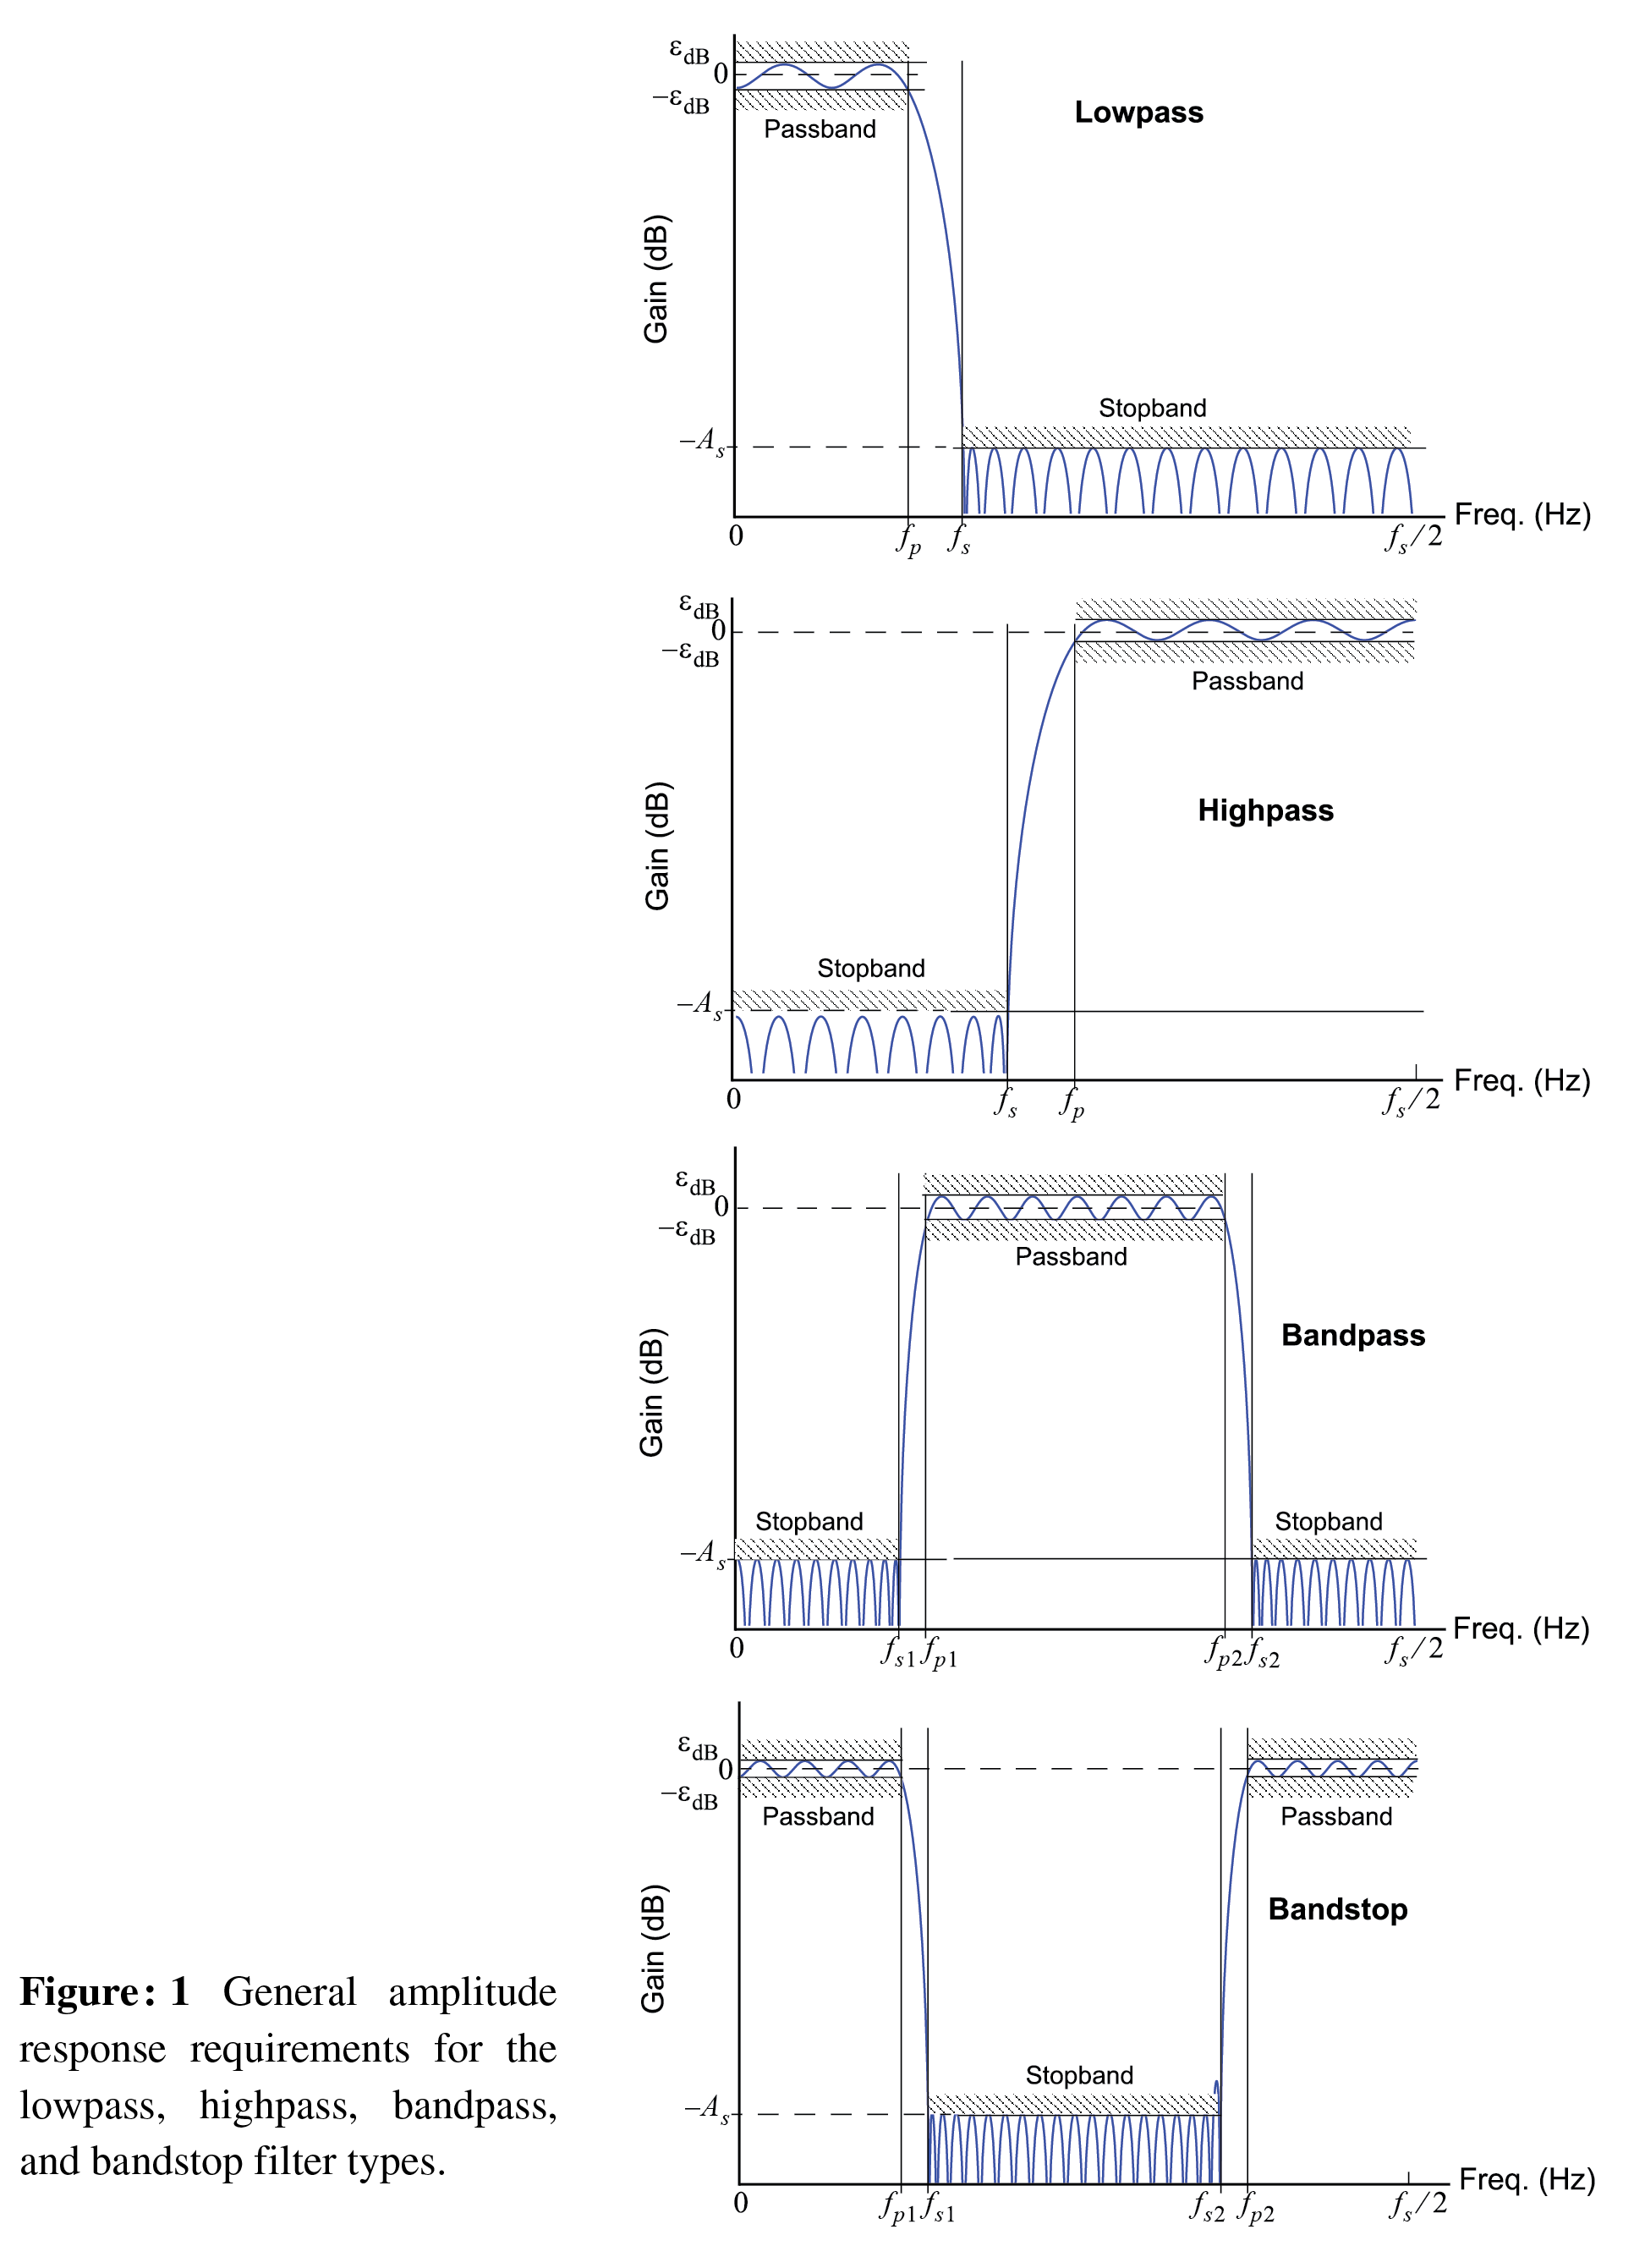

Gambar di atas menunjukkan persyaratan respons amplitudo umum untuk empat jenis filter: lowpass, highpass, bandpass, dan bandstop.

Filter Lowpass (Penyaring Lolos Rendah):

Passband (Pita Lolos): Rentang frekuensi di mana sinyal diteruskan dengan sedikit atau tanpa redaman (penurunan gain). Frekuensi ini berada di bawah frekuensi cutoff
𝑓
𝑝
f
p
​
 .
Stopband (Pita Stop): Rentang frekuensi di mana sinyal sangat teredam atau dihapus. Frekuensi ini berada di atas frekuensi cutoff
𝑓
𝑠
f
s
​
 .
Transition Band (Pita Transisi): Area antara frekuensi cutoff passband
𝑓
𝑝
f
p
​
  dan frekuensi cutoff stopband
𝑓
𝑠
f
s
​
 , di mana respons filter berubah dari passband ke stopband.



Filter Highpass (Penyaring Lolos Tinggi):
Passband (Pita Lolos): Rentang frekuensi di mana sinyal diteruskan, berada di atas frekuensi cutoff
𝑓
𝑝
f
p
​
 .
Stopband (Pita Stop): Rentang frekuensi di mana sinyal sangat teredam, berada di bawah frekuensi cutoff
𝑓
𝑠
f
s
​
 .
Transition Band (Pita Transisi): Area antara frekuensi cutoff stopband
𝑓
𝑠
f
s
​
  dan frekuensi cutoff passband
𝑓
𝑝
f
p
​
 , di mana respons filter berubah dari stopband ke passband.


Filter Bandpass (Penyaring Pita Lolos):

Passband (Pita Lolos): Rentang frekuensi di mana sinyal diteruskan, berada di antara dua frekuensi cutoff
𝑓
𝑝
1
f
p1
​
  dan
𝑓
𝑝
2
f
p2
​
 .


Stopband (Pita Stop): Dua rentang frekuensi di mana sinyal sangat teredam, berada di bawah frekuensi cutoff
𝑓
𝑠
1
f
s1
​
  dan di atas frekuensi cutoff
𝑓
𝑠
2
f
s2
​
 .
Transition Bands (Pita Transisi): Dua area transisi, satu antara
𝑓
𝑠
1
f
s1
​
  dan
𝑓
𝑝
1
f
p1
​
 , dan yang lainnya antara
𝑓
𝑝
2
f
p2
​
  dan
𝑓
𝑠
2
f
s2
​
 .


Filter Bandstop (Penyaring Pita Stop):

Passband (Pita Lolos): Dua rentang frekuensi di mana sinyal diteruskan, satu di bawah frekuensi cutoff
𝑓
𝑝
1
f
p1
​
  dan satu lagi di atas frekuensi cutoff
𝑓
𝑝
2
f
p2
​
 .
Stopband (Pita Stop): Rentang frekuensi di mana sinyal sangat teredam, berada di antara dua frekuensi cutoff
𝑓
𝑠
1
f
s1
​
  dan
𝑓
𝑠
2
f
s2
​
 .
Transition Bands (Pita Transisi): Dua area transisi, satu antara
𝑓
𝑝
1
f
p1
​
  dan
𝑓
𝑠
1
f
s1
​
 , dan yang lainnya antara
𝑓
𝑠
2
f
s2
​
  dan
𝑓
𝑝
2
f
p2
​
 .
Dalam setiap filter, pita lolos (passband) didefinisikan oleh batas-batas frekuensi di mana gain (penguatan) berada dalam batas toleransi
±
𝜖
𝑑
𝐵
±ϵ
dB
​
 . Di luar pita lolos, gain harus turun ke tingkat atenuasi
𝐴
𝑠
A
s
​
  dalam pita stop (stopband). Zona transisi (transition band) menghubungkan passband dan stopband, menandakan perubahan dari satu ke yang lain.

In [13]:
b_k = fir_d.firwin_kaiser_lpf(1/8, 1/6, 50, 1.0)  # Memanggil fungsi firwin_kaiser_lpf dari modul fir_d untuk mendesain filter low-pass FIR menggunakan metode Kaiser window.
b_r = fir_d.fir_remez_lpf(1/8, 1/6, 0.2, 50, 1.0)  # Memanggil fungsi fir_remez_lpf dari modul fir_d untuk mendesain filter low-pass FIR menggunakan metode Remez exchange algorithm.

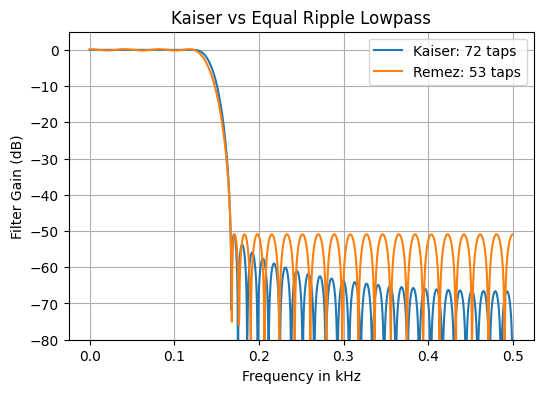

In [14]:
# Menghitung dan memplot respons frekuensi dari dua filter FIR yang dirancang menggunakan metode Kaiser dan Remez, serta menyesuaikan visualisasi plot.

fir_d.freqz_resp_list([b_k, b_r], [[1], [1]], 'dB', fs=1)  # Menghitung respons frekuensi filter dengan menggunakan fungsi freqz_resp_list dari modul fir_d.
ylim([-80, 5])  # Mengatur batas vertikal (sumbu y) plot dari -80 dB hingga 5 dB.
title(r'Kaiser vs Equal Ripple Lowpass')  # Memberikan judul pada plot.
ylabel(r'Filter Gain (dB)')  # Menambahkan label sumbu y.
xlabel(r'Frequency in kHz')  # Menambahkan label sumbu x.
legend((r'Kaiser: %d taps' % len(b_k), r'Remez: %d taps' % len(b_r)), loc='best')  # Menambahkan legenda dengan jumlah taps untuk masing-masing filter.
grid()  # Menambahkan grid pada plot.

Gambar ini menunjukkan grafik respons frekuensi filter Kaiser vs Equal Ripple Lowpass. Filter Kaiser memiliki 27 tap, sedangkan filter Equal Ripple Lowpass memiliki 53 tap.

Tap dalam konteks filter mengacu pada jumlah koefisien yang digunakan dalam filter. Filter dengan lebih banyak tap umumnya lebih akurat dalam menghasilkan respons frekuensi yang diinginkan, tetapi juga lebih kompleks secara komputasi.

Sumbu x grafik menunjukkan frekuensi dalam kHz, sedangkan sumbu y menunjukkan gain filter dalam dB. Gain filter menunjukkan seberapa banyak sinyal pada setiap frekuensi yang diperkuat atau dilemahkan oleh filter.

Filter Kaiser memiliki respons frekuensi yang lebih halus daripada filter Equal Ripple Lowpass. Ini berarti bahwa filter Kaiser memiliki riak passband dan atenuasi stopband yang lebih rendah. Namun, filter Kaiser juga memiliki panjang filter yang lebih panjang, yang berarti lebih kompleks secara komputasi.

Filter Equal Ripple Lowpass memiliki respons frekuensi yang lebih tajam daripada filter Kaiser. Ini berarti bahwa filter Equal Ripple Lowpass memiliki riak passband dan atenuasi stopband yang lebih tinggi. Namun, filter Equal Ripple Lowpass juga memiliki panjang filter yang lebih pendek, yang berarti lebih sederhana secara komputasi.



In [15]:
# Mendesain filter high-pass menggunakan metode Kaiser dan Remez, dan menyimpan koefisiennya.

b_k_hp = fir_d.firwin_kaiser_hpf(1/8, 1/6, 50, 1.0)  # Mendesain filter high-pass menggunakan metode Kaiser.
b_r_hp = fir_d.fir_remez_hpf(1/8, 1/6, 0.2, 50, 1.0)  # Mendesain filter high-pass menggunakan metode Remez.

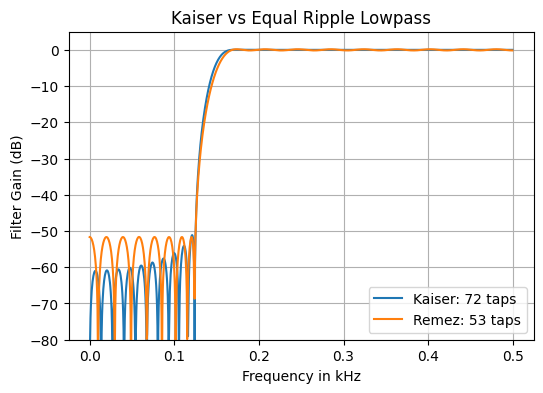

In [16]:
# Menghitung dan memplot respons frekuensi dari dua filter high-pass yang telah didesain menggunakan metode Kaiser dan Remez.

fir_d.freqz_resp_list([b_k_hp, b_r_hp], [[1], [1]], 'dB', fs=1)  # Menghitung respons frekuensi filter high-pass dengan menggunakan fungsi freqz_resp_list dari modul fir_d.
ylim([-80, 5])  # Mengatur batas vertikal (sumbu y) plot dari -80 dB hingga 5 dB.
title(r'Kaiser vs Equal Ripple Lowpass')  # Memberikan judul pada plot.
ylabel(r'Filter Gain (dB)')  # Menambahkan label sumbu y.
xlabel(r'Frequency in kHz')  # Menambahkan label sumbu x.
legend((r'Kaiser: %d taps' % len(b_k_hp), r'Remez: %d taps' % len(b_r_hp)), loc='best')  # Menambahkan legenda dengan jumlah taps untuk masing-masing filter high-pass.
grid()  # Menambahkan grid pada plot.

Gambar yang Anda berikan menunjukkan grafik frekuensi respon dua jenis filter lowpass, yaitu Kaiser dan Equal Ripple. Grafik ini membandingkan kinerja kedua filter dalam meredam frekuensi di atas frekuensi cutoff.

Kaiser Filter

Filter Kaiser menggunakan jendela Kaiser untuk mendesain respons frekuensi. Jendela Kaiser memungkinkan transisi yang lebih tajam antara band pass dan band stop dibandingkan dengan jendela lain, seperti jendela persegi panjang. Hal ini menghasilkan filter dengan jumlah tap yang lebih sedikit untuk mencapai kinerja yang sama dengan filter lain.

Pada grafik, filter Kaiser dengan 72 tap memiliki respons frekuensi yang lebih rata di band pass dan redaman yang lebih kuat di band stop dibandingkan dengan filter Equal Ripple dengan 53 tap. Hal ini menunjukkan bahwa filter Kaiser lebih efektif dalam meredam frekuensi di atas frekuensi cutoff.

Equal Ripple Filter

Filter Equal Ripple menggunakan metode Remez untuk mendesain respons frekuensi. Metode Remez memungkinkan filter untuk mencapai riak maksimum yang sama di seluruh band pass. Hal ini menghasilkan filter dengan respons frekuensi yang lebih datar di band pass dibandingkan dengan filter lain.

Pada grafik, filter Equal Ripple dengan 53 tap memiliki respons frekuensi yang lebih datar di band pass dibandingkan dengan filter Kaiser dengan 72 tap. Hal ini menunjukkan bahwa filter Equal Ripple lebih baik dalam menghasilkan sinyal yang tidak terdistorsi di band pass.

In [17]:
# Mendesain filter band-pass menggunakan metode Kaiser dan Remez, dan menyimpan koefisiennya.

b_k_bp = fir_d.firwin_kaiser_bpf(7000, 8000, 14000, 15000, 50, 48000)  # Mendesain filter band-pass menggunakan metode Kaiser.
b_r_bp = fir_d.fir_remez_bpf(7000, 8000, 14000, 15000, 0.2, 50, 48000)  # Mendesain filter band-pass menggunakan metode Remez.

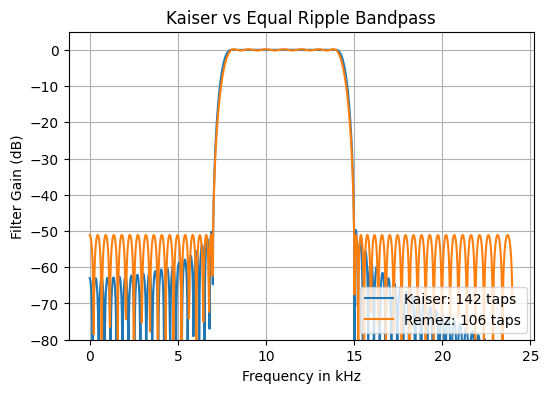

In [18]:
fir_d.freqz_resp_list([b_k_bp,b_r_bp],[[1],[1]],'dB',fs=48)
ylim([-80,5])
title(r'Kaiser vs Equal Ripple Bandpass')
ylabel(r'Filter Gain (dB)')
xlabel(r'Frequency in kHz')
legend((r'Kaiser: %d taps' % len(b_k_bp),
        r'Remez: %d taps' % len(b_r_bp)),
       loc='lower right')
grid();

Gambar di atas menunjukkan grafik yang membandingkan kinerja dua jenis filter digital yang digunakan dalam pemrosesan sinyal: filter Kaiser dan filter Equal Ripple (juga dikenal sebagai filter Remez).
 Dalam grafik ini, sumbu horizontal  menunjukkan frekuensi dalam kilohertz (kHz) dan sumbu vertikal  menunjukkan penguatan filter dalam desibel (dB).
 Filter Kaiser atau Remez diwakili secara grafis oleh kurva dengan  warna berbeda.

- Kurva  oranye menunjukkan respons frekuensi  filter Kaiser.

- Kurva  biru menunjukkan respons frekuensi  filter Remez.

Gambar ini menunjukkan bahwa kedua filter memiliki "passbands" yang cukup lebar (rentang frekuensi di mana sinyal dapat melewati filter dengan sedikit atau tanpa redaman) dari 0 hingga sekitar 10 kHz.
 Berikutnya adalah "stopband" (rentang frekuensi di mana sinyal diblokir atau dikurangi secara signifikan), di mana kinerja kedua filter mulai berbeda.
 Filter Kaiser memiliki fluktuasi stopband yang lebih terkontrol  (kurva lebih halus), dan filter Remez memiliki “riak” atau fluktuasi yang lebih tajam.
 Di bawah grafik terdapat judul yang memberikan informasi rinci tentang konfigurasi filter.
 Filter Kaiser  menggunakan 142 ketukan dan filter Remez menggunakan 106 ketukan.
 "Tap" adalah istilah dalam desain filter FIR yang mengacu pada jumlah koefisien yang digunakan untuk penyaringan.
 Semakin banyak ketukan berarti filter memiliki respons frekuensi  yang lebih akurat atau lebih baik.



In [19]:
# Mendesain filter low-pass menggunakan metode Remez, dan menyimpan koefisiennya.

b_up = fir_d.fir_remez_lpf(3300, 4300, 0.5, 60, 96000)  # Mendesain filter low-pass menggunakan metode Remez.

In [20]:
# Menginisialisasi proses multirate filtering dengan filter FIR yang telah didesain sebelumnya.

mr_up = mrh.multirate_FIR(b_up)

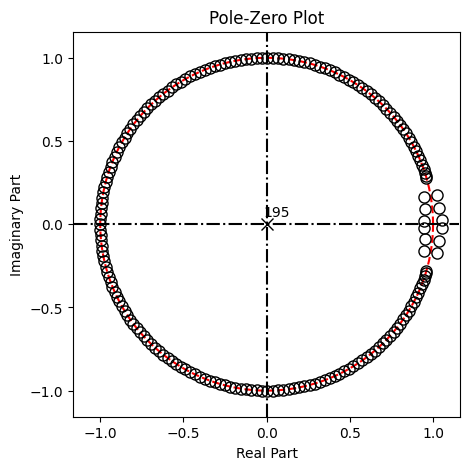

In [21]:
# Take a look at the pole-zero configuration of this very
# high-order (many taps) linear phase FIR
mr_up.zplane()

Gambar yang Anda berikan menunjukkan plot pole-zero. Plot ini merupakan grafik yang menunjukkan hubungan antara pole dan zero suatu sistem kontrol.

Pole dan zero adalah nilai kompleks yang penting dalam menentukan kinerja suatu sistem kontrol. Pole merupakan nilai kompleks yang menyebabkan respons sistem menjadi tak terbatas, sedangkan zero merupakan nilai kompleks yang menyebabkan respons sistem menjadi nol.

Lokasi pole dan zero pada plot pole-zero dapat memberikan informasi tentang stabilitas dan kinerja sistem. Sistem yang stabil memiliki pole yang terletak di sisi kiri bidang kompleks, sedangkan sistem yang tidak stabil memiliki pole yang terletak di sisi kanan bidang kompleks.

Jarak antara pole dan zero juga dapat memberikan informasi tentang kecepatan respons sistem. Jarak yang lebih dekat antara pole dan zero menghasilkan respons yang lebih cepat, sedangkan jarak yang lebih jauh menghasilkan respons yang lebih lambat.

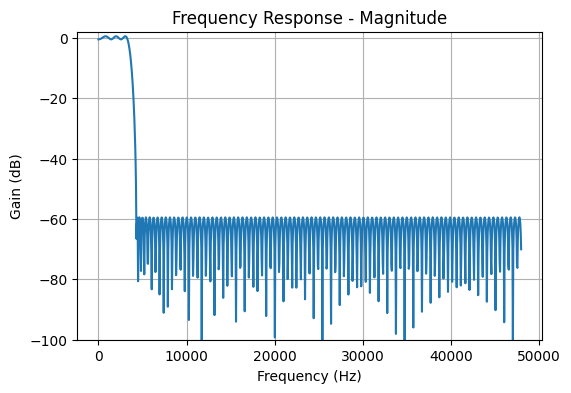

In [22]:
# Memverifikasi respons frekuensi filter untuk memastikan gain pada passband dan stopband sesuai dengan yang diharapkan.

mr_up.freq_resp('db', 96000)

Gambar tersebut menunjukkan grafik respons frekuensi dan magnitudo dari sinyal. Grafik menunjukkan respons frekuensi sinyal dalam satuan desibel (dB) terhadap frekuensi dalam satuan Hertz (Hz).

Sumbu x menunjukkan frekuensi sinyal, sedangkan sumbu y menunjukkan magnitudo respons frekuensi. Magnitudi respons frekuensi diukur dalam satuan dB.

Grafik menunjukkan bahwa respons frekuensi sinyal menurun dengan frekuensi yang semakin tinggi. Hal ini berarti bahwa sinyal memiliki energi yang lebih sedikit pada frekuensi tinggi.

Penurunan respons frekuensi ini disebabkan oleh beberapa faktor, seperti karakteristik filter yang digunakan untuk memproses sinyal, atau karakteristik sumber sinyal itu sendiri.

Berikut adalah beberapa detail tambahan yang dapat diamati dari gambar:

-Respons frekuensi sinyal mulai menurun pada frekuensi sekitar 10 kHz.


-Respons frekuensi sinyal turun hingga -20 dB pada frekuensi 20 kHz.


-Respons frekuensi sinyal turun hingga -40 dB pada frekuensi 30 kHz.


-Respons frekuensi sinyal turun hingga -60 dB pada frekuensi 40 kHz.


-Respons frekuensi sinyal turun hingga -80 dB pada frekuensi 50 kHz.


Informasi ini dapat digunakan untuk menganalisis karakteristik sinyal dan untuk merancang filter yang sesuai untuk memproses sinyal.

In [23]:
# Menghitung jumlah taps dari filter FIR dengan mengurangkan 1 dari panjang koefisien filter (len(b_up)-1)
# dan kemudian membaginya dengan 2.
(len(b_up-1))/2

98.0

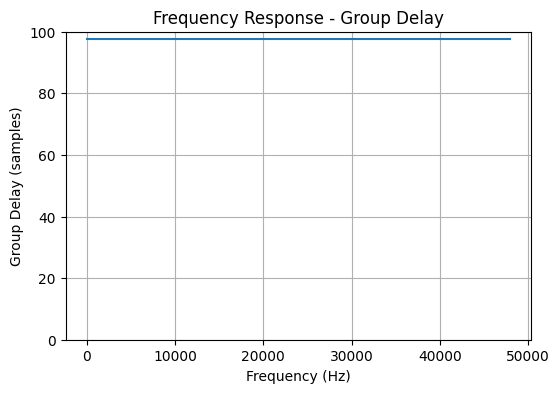

In [24]:
# Memverifikasi bahwa desain FIR memiliki group delay konstan sebesar (N_taps - 1)/2 sampel.

mr_up.freq_resp('groupdelay_s', 96000, [0, 100])

Grafik di atas menunjukkan penundaan kelompok sebagai fungsi frekuensi dalam hertz (Hz).
 Di sisi vertikal (sumbu Y) adalah "keterlambatan kelompok" yang diukur dalam "sampel".
 Di sisi horizontal (sumbu X), kami mengukur "frekuensi" dalam Hertz (Hz).


 Penundaan grup adalah ukuran waktu yang dibutuhkan sinyal untuk melewati suatu sistem, dan biasanya sangat penting ketika menganalisis sistem audio dan respons frekuensinya.
 Dalam konteks ini, diagram ini dimaksudkan untuk menunjukkan bagaimana penundaan grup berubah seiring  perubahan frekuensi.
 Grafik tampak relatif datar untuk nilai penundaan grup sekitar 100 sampel, tanpa  perubahan  signifikan sepanjang spektrum frekuensi tertentu dari 0 Hz hingga 50.000 Hz.


 Hal ini menunjukkan bahwa sistem atau perangkat yang diuji  konsisten di semua frekuensi yang diuji.
 Penundaan kolektif.


 Stabilitas penundaan grup biasanya menunjukkan bahwa sistem memiliki fase linier atau mendekati linier, yang penting untuk menjaga integritas temporal dari sinyal yang diproses.



In [25]:
# Mendesain filter IIR (Infinite Impulse Response) menggunakan metode Butterworth, Chebyshev tipe 1, Chebyshev tipe 2, dan elliptic.

fs = 48000  # Frekuensi sampling
f_pass = 5000  # Frekuensi cutoff passband
f_stop = 8000  # Frekuensi cutoff stopband
# Mendesain filter menggunakan metode Butterworth
b_but, a_but, sos_but = iir_d.IIR_lpf(f_pass, f_stop, 0.5, 60, fs, 'butter')
# Mendesain filter menggunakan metode Chebyshev tipe 1
b_cheb1, a_cheb1, sos_cheb1 = iir_d.IIR_lpf(f_pass, f_stop, 0.5, 60, fs, 'cheby1')
# Mendesain filter menggunakan metode Chebyshev tipe 2
b_cheb2, a_cheb2, sos_cheb2 = iir_d.IIR_lpf(f_pass, f_stop, 0.5, 60, fs, 'cheby2')
# Mendesain filter menggunakan metode elliptic
b_elli, a_elli, sos_elli = iir_d.IIR_lpf(f_pass, f_stop, 0.5, 60, fs, 'ellip')

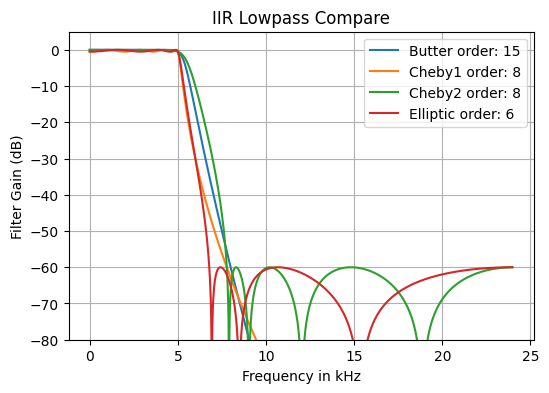

In [26]:
# Memplot respons frekuensi dari filter IIR low-pass dengan berbagai jenis filter
# menggunakan fungsi freqz_resp_cas_list() dari paket iir_d.
# Parameter-parameter yang diberikan adalah daftar second-order sections (sos) dari masing-masing jenis filter,
# tipe respons (dB untuk respons dalam dB), dan frekuensi sampling (48 kHz).
iir_d.freqz_resp_cas_list([sos_but, sos_cheb1, sos_cheb2, sos_elli], 'dB', fs=48)

# Mengatur batas sumbu y dari -80 hingga 5
ylim([-80, 5])

# Menambahkan judul pada plot
title(r'IIR Lowpass Compare')

# Memberi label sumbu y dengan 'Filter Gain (dB)'
ylabel(r'Filter Gain (dB)')

# Memberi label sumbu x dengan 'Frequency in kHz'
xlabel(r'Frequency in kHz')

# Menambahkan legenda dengan urutan filter dan jumlah order untuk setiap jenis filter
legend((r'Butter order: %d' % (len(a_but) - 1),
        r'Cheby1 order: %d' % (len(a_cheb1) - 1),
        r'Cheby2 order: %d' % (len(a_cheb2) - 1),
        r'Elliptic order: %d' % (len(a_elli) - 1)), loc='best')

# Menampilkan grid pada plot
grid()

Gambar yang Anda berikan menunjukkan grafik perbandingan respons frekuensi filter lowpass IIR dengan urutan berbeda. Filter lowpass IIR adalah jenis filter yang digunakan untuk melewatkan sinyal dengan frekuensi di bawah frekuensi cutoff dan melemahkan sinyal dengan frekuensi di atas frekuensi cutoff.

Pada grafik, frekuensi diplot pada sumbu x, dan gain filter diplot pada sumbu y. Gain filter diukur dalam desibel (dB).

Urutan filter mengacu pada jumlah kutub dan nol yang dimiliki filter. Kutub dan nol adalah angka kompleks yang menentukan respons frekuensi filter. Filter dengan urutan yang lebih tinggi memiliki lebih banyak kutub dan nol, dan umumnya memiliki respons frekuensi yang lebih tajam.

Butterworth adalah jenis filter lowpass IIR yang memiliki respons frekuensi yang paling datar di pita pass. Ini berarti bahwa gain filter hampir konstan di seluruh pita pass. Filter Butterworth memiliki transisi yang lebih lambat dari pita pass ke pita stop daripada jenis filter lainnya.

Chebyshev I adalah jenis filter lowpass IIR yang memiliki riak di pita pass. Riak adalah variasi gain filter di pita pass. Filter Chebyshev I memiliki transisi yang lebih cepat dari pita pass ke pita stop daripada filter Butterworth.

Chebyshev II adalah jenis filter lowpass IIR yang memiliki riak di pita stop. Filter Chebyshev II memiliki transisi yang lebih cepat dari pita pass ke pita stop daripada filter Butterworth atau Chebyshev I.

Eliptik adalah jenis filter lowpass IIR yang memiliki riak di pita pass dan pita stop. Filter eliptik memiliki transisi yang paling cepat dari pita pass ke pita stop daripada jenis filter lainnya.

Bessel adalah jenis filter lowpass IIR yang memiliki waktu tunda grup yang konstan di pita pass. Waktu tunda grup adalah waktu yang dibutuhkan sinyal untuk melewati filter. Filter Bessel digunakan dalam aplikasi di mana penting untuk menjaga bentuk sinyal, seperti dalam pemrosesan audio.

Pada grafik, filter Butterworth dengan urutan 15 memiliki respons frekuensi yang paling datar dan transisi yang paling lambat. Filter Chebyshev I dengan urutan 8 memiliki riak di pita pass dan transisi yang lebih cepat daripada filter Butterworth. Filter Chebyshev II dengan urutan 8 memiliki riak di pita stop dan transisi yang lebih cepat daripada filter Chebyshev I. Filter eliptik dengan urutan 6 memiliki riak di pita pass dan pita stop dan transisi yang paling cepat. Filter Bessel dengan urutan 6 memiliki waktu tunda grup yang konstan di pita pass.

Pilihan filter yang tepat untuk aplikasi tertentu bergantung pada persyaratan spesifik aplikasi tersebut. Misalnya, filter Butterworth mungkin menjadi pilihan yang baik untuk aplikasi di mana penting untuk memiliki respons frekuensi yang datar. Filter Chebyshev I atau Chebyshev II mungkin menjadi pilihan yang baik untuk aplikasi di mana penting untuk memiliki transisi yang cepat dari pita pass ke pita stop. Filter eliptik mungkin menjadi pilihan yang baik untuk aplikasi di mana penting untuk memiliki transisi yang paling cepat. Filter Bessel mungkin menjadi pilihan yang baik untuk aplikasi di mana penting untuk menjaga bentuk sinyal.

(15, 15)

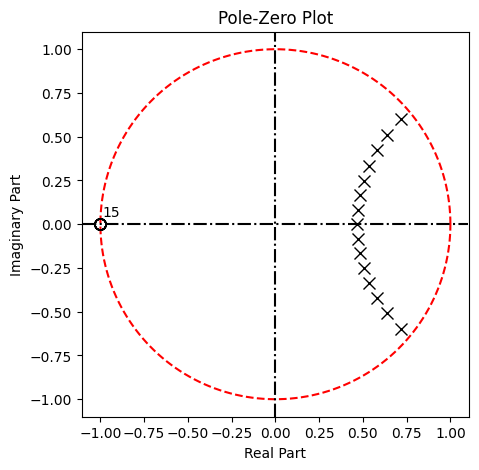

In [27]:
# Menampilkan konfigurasi pole-zero dari filter IIR menggunakan metode sos_zplane()
# dari paket iir_d. Parameter yang diberikan adalah second-order sections (sos) dari filter Butterworth.
iir_d.sos_zplane(sos_but)

Gambar diatas adalah sebuah plot kutub-nol (pole-zero plot) yang digunakan dalam analisis sistem kontrol atau sistem pemrosesan sinyal. Grafik ini digambarkan dalam bidang kompleks dengan sumbu horizontal yang menunjukkan bagian real dan sumbu vertikal yang menunjukkan bagian imajiner.

Pada plot ini:

Titik "X" menandakan lokasi nol dari fungsi transfer, yaitu nilai-nilai input yang membuat output fungsi tersebut menjadi nol.
Lingkaran "O" menandakan lokasi kutub dari fungsi transfer, yaitu nilai-nilai di mana fungsi transfer menjadi tak terhingga atau sistem menjadi tidak stabil.
Lingkaran putus-putus merah menunjukkan suatu batas atau lokasi khusus dalam analisis, yang mungkin digunakan untuk menilai stabilitas atau karakteristik lain dari sistem.

Dari plot ini, kita dapat melihat bahwa sistem memiliki banyak nol dan beberapa kutub, dipusatkan di sekitar asal koordinat (0,0) dalam bidang kompleks.

In [28]:
# Mendesain filter IIR low-pass menggunakan metode Elliptic
# Parameter-parameter yang diberikan adalah normalized cutoff frequencies (1950 dan 2050),
# normalized band edges (0.5), jumlah taps (80), frekuensi sampling (8000 Hz), dan jenis filter ('ellip').
b_lp, a_lp, sos_lp = iir_d.IIR_lpf(1950, 2050, 0.5, 80, 8000., 'ellip')

# Membuat filter IIR dengan metode multirate menggunakan fungsi multirate_IIR()
mr_lp = mrh.multirate_IIR(sos_lp)

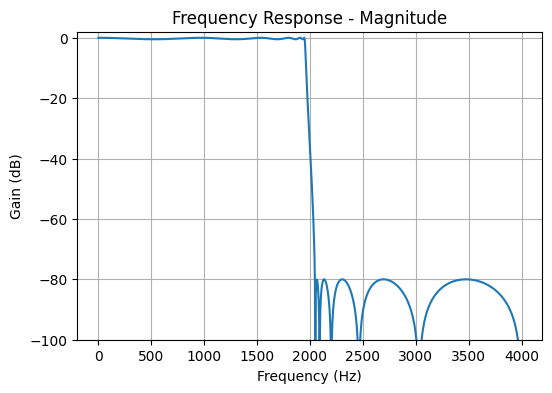

In [29]:
# Menghitung respons frekuensi dari filter IIR menggunakan metode multirate
# Parameter-parameter yang diberikan adalah tipe respons (dB) dan frekuensi sampling (8000 Hz).
mr_lp.freq_resp('db', 8000)

Gambar di atas menunjukkan grafik respon frekuensi dan magnitudo dari gelombang suara. Sumbu horizontal menunjukkan frekuensi gelombang suara dalam Hertz (Hz), sedangkan sumbu vertikal menunjukkan magnitudo gelombang suara dalam desibel (dB).

Magnitudo gelombang suara adalah ukuran kekuatannya. Semakin tinggi magnitudo gelombang suara, semakin keras suaranya. Desibel adalah unit pengukuran intensitas suara yang logaritmik. Ini berarti bahwa peningkatan 10 dB dalam magnitudo gelombang suara mewakili peningkatan 10 kali lipat dalam intensitas suara yang dirasakan.

Grafik respon frekuensi menunjukkan bagaimana magnitudo gelombang suara berubah sebagai respons terhadap frekuensi. Dalam grafik ini, magnitudo gelombang suara umumnya menurun dengan bertambahnya frekuensi. Ini berarti bahwa gelombang suara frekuensi tinggi umumnya lebih lemah daripada gelombang suara frekuensi rendah.

Namun, ada beberapa pengecualian untuk aturan ini. Misalnya, dalam grafik ini, terdapat puncak pada sekitar 1 kHz. Ini menunjukkan bahwa gelombang suara dengan frekuensi 1 kHz memiliki magnitudo yang lebih besar daripada gelombang suara dengan frekuensi yang lebih rendah atau lebih tinggi.

Puncak ini mungkin disebabkan oleh resonansi akustik dalam sistem yang menghasilkan gelombang suara. Resonansi akustik terjadi ketika gelombang suara dipantulkan bolak-balik di antara dua permukaan keras, seperti dinding ruangan. Ini dapat meningkatkan magnitudo gelombang suara pada frekuensi tertentu.



(-130.0, -30.0)

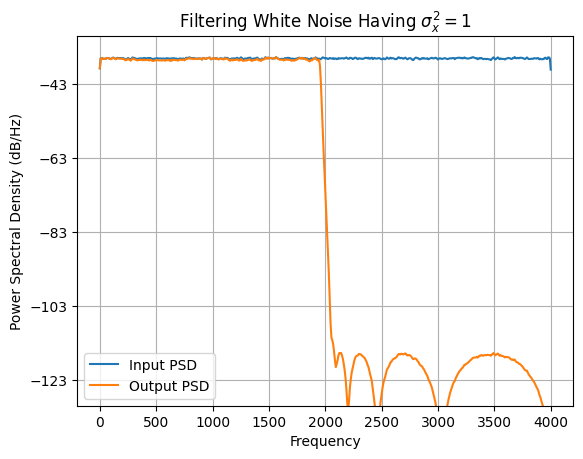

In [30]:
# Menghasilkan 1 juta sampel data acak menggunakan fungsi randn()
x = randn(1000000)

# Memfilter data menggunakan filter multirate yang telah dibuat
y = mr_lp.filter(x)

# Menghitung dan memplot spektrum daya menggunakan fungsi psd()
# Parameter yang diberikan adalah data (x dan y), jumlah sampel FFT (2^10), dan frekuensi sampling (8000 Hz).
psd(x, 2**10, 8000)
psd(y, 2**10, 8000)

# Menambahkan judul pada plot
title(r'Filtering White Noise Having $\sigma_x^2 = 1$')

# Menambahkan legenda dengan label 'Input PSD' dan 'Output PSD' pada lokasi terbaik
legend(('Input PSD', 'Output PSD'), loc='best')

# Mengatur batas sumbu y dari -130 hingga -30
ylim([-130, -30])

Gambar ini menunjukkan grafik spektrum daya dari filter white noise. Grafik tersebut menunjukkan efisiensi daya dari filter white noise dengan parameter a sama dengan 1.

Sumbu X pada grafik menunjukkan frekuensi dalam satuan Hertz (Hz). Sumbu Y menunjukkan kepadatan spektrum daya (Power Spectral Density) dalam satuan decibel per Hertz (dB/Hz).

Garis biru pada grafik menunjukkan input power spectral density (PSD), sedangkan garis merah menunjukkan output PSD. Input PSD menunjukkan tingkat daya pada sinyal white noise sebelum difilter. Output PSD menunjukkan tingkat daya pada sinyal white noise setelah difilter.

Dapat dilihat dari grafik bahwa filter white noise dengan parameter a sama dengan 1 dapat secara efektif mengurangi tingkat daya pada sinyal white noise di semua frekuensi. Hal ini terlihat dari garis merah yang berada di bawah garis biru pada hampir semua frekuensi.

In [31]:
# Menentukan frekuensi sampling
fs = 8000

# Menghitung dan mencetak PSD yang diharapkan dalam satuan dB/Hz menggunakan rumus 10*log10(fs)
print('Expected PSD of %2.3f dB/Hz' % (0 - 10 * log10(fs),))

Expected PSD of -39.031 dB/Hz


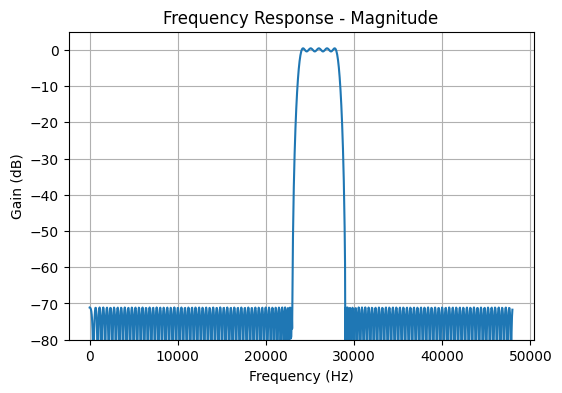

In [32]:
# Mendefinisikan koefisien filter menggunakan metode Remez
b_rec_bpf1 = fir_d.fir_remez_bpf(23000,24000,28000,29000,0.5,70,96000,8)

# Memplot respons frekuensi filter menggunakan koefisien yang didefinisikan sebelumnya
fir_d.freqz_resp_list([b_rec_bpf1],[1],mode='dB',fs=96000)

# Menentukan batas vertikal pada plot
ylim([-80, 5])

# Menampilkan grid pada plot
grid();

Gambar di atas menunjukkan grafik respon frekuensi dan magnitudo speaker. Grafik ini menunjukkan bagaimana speaker merespons sinyal audio dengan frekuensi yang berbeda.

Sumbu X pada grafik menunjukkan frekuensi dalam satuan Hertz (Hz). Frekuensi adalah jumlah siklus gelombang suara per detik. Semakin tinggi frekuensi, semakin tinggi nada suara.

Sumbu Y pada grafik menunjukkan magnitudo dalam satuan desibel (dB). Magnitudo adalah ukuran kekuatan sinyal audio. Semakin tinggi nilai dB, semakin keras suara yang dihasilkan.

Kurva pada grafik menunjukkan respon frekuensi speaker. Kurva ini menunjukkan bagaimana kekuatan suara yang dihasilkan speaker berubah-ubah dengan frekuensi.

Area datar pada kurva menunjukkan rentang frekuensi di mana speaker menghasilkan suara dengan kekuatan yang relatif konstan. Rentang frekuensi ini disebut respon frekuensi datar.

Titik-titik di luar area datar menunjukkan frekuensi di mana speaker menghasilkan suara dengan kekuatan yang lebih rendah atau lebih tinggi.

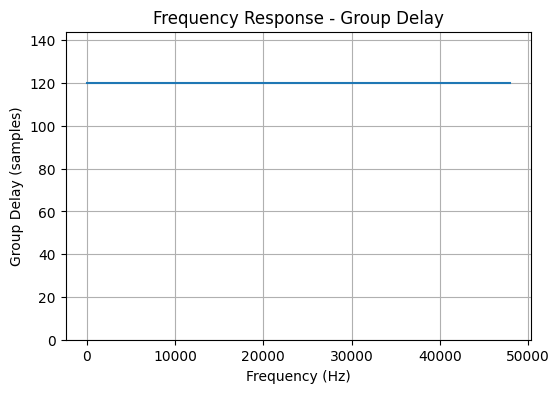

In [33]:
# Mendesain filter band-pass menggunakan metode Remez dan memplot group delay responsnya.

b_rec_bpf1 = fir_d.fir_remez_bpf(23000, 24000, 28000, 29000, 0.5, 70, 96000, 8)  # Mendesain filter band-pass menggunakan metode Remez.
fir_d.freqz_resp_list([b_rec_bpf1], [1], mode='groupdelay_s', fs=96000)  # Menghitung dan memplot respons group delay filter.
grid()  # Menambahkan grid pada plot.

Grafik diatas adalah plot yang menggambarkan "Group Delay" terhadap "Frequency" untuk suatu sistem atau komponen elektronik. Ini adalah tipe diagram yang sering digunakan dalam analisis sistem audio atau sistem komunikasi untuk mengevaluasi bagaimana suatu sinyal dipengaruhi oleh sistem di berbagai frekuensi.

Sumbu X (Frekuensi): Menunjukkan frekuensi sinyal dari 0 Hz hingga 50.000 Hz. Ini merupakan range frekuensi yang luas, mencakup dari frekuensi sangat rendah hingga frekuensi yang cukup tinggi, yang seringkali mencakup spektrum audio dan sebagian frekuensi radio.

Sumbu Y (Group Delay - dalam sampel): Menujukkan nilai group delay yang diukur dalam jumlah sampel. Group delay adalah ukuran waktu yang diperlukan oleh semua komponen frekuensi sinyal untuk melewati sistem. Nilai yang konstan (sekitar 140 sampel dalam kasus ini) menunjukkan bahwa delay tidak berubah sepanjang rentang frekuensi yang diuji, yang idealnya menunjukkan bahwa fase sinyal tidak terdistorsi secara signifikan oleh sistem pada berbagai frekuensi.

Pengamatan Umum: Dalam grafik ini, group delay tetap konstan di nilai sekitar 140 sampel untuk semua frekuensi yang direpresentasikan. Ini bisa diinterpretasikan bahwa sistem memiliki karakteristik phase-linear terhadap frekuensi, yang bisa dianggap baik dalam banyak aplikasi audio dan komunikasi karena meminimasi distorsi fase.

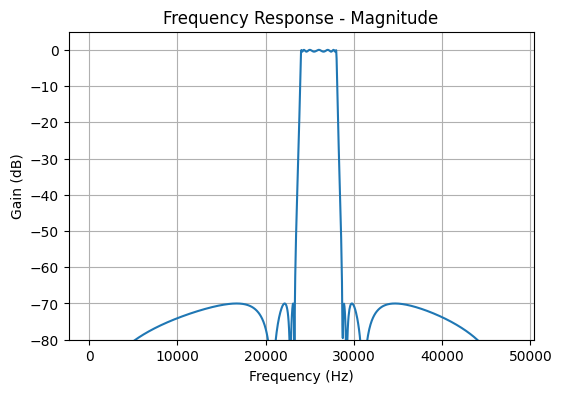

In [34]:
# Mendesain filter band-pass IIR menggunakan metode elliptic dan memplot respons frekuensinya.

b_rec_bpf2, a_rec_bpf2, sos_rec_bpf2 = iir_d.IIR_bpf(23000, 24000, 28000, 29000,  # Mendesain filter band-pass IIR menggunakan metode elliptic.
                                                     0.5, 70, 96000, 'ellip')
with np.errstate(divide='ignore'):  # Mengabaikan peringatan pembagian oleh nol saat menghitung respons frekuensi.
    iir_d.freqz_resp_cas_list([sos_rec_bpf2], mode='dB', fs=96000)  # Menghitung dan memplot respons frekuensi dari filter IIR dalam desibel.
ylim([-80, 5])  # Mengatur batas vertikal (sumbu y) plot dari -80 dB hingga 5 dB.
grid()  # Menambahkan grid pada plot.

Gambar diatas menunjukkan grafik respons frekuensi dalam bentuk magnitudo. Grafik ini secara khusus menggambarkan hubungan antara gain, yang diukur dalam desibel (dB), dan frekuensi, yang diukur dalam Hertz (Hz). Ini adalah alat yang umum digunakan dalam analisis sistem audio, filter, dan elektronik lainnya untuk menentukan bagaimana sistem tersebut merespon pada berbagai frekuensi.

Dari grafik, kita dapat melihat beberapa ciri khas:

Puncak Gain Utama: Terdapat satu puncak gain besar yang mencapai nilai gain positif dan sangat terlokalisasi pada rentang frekuensi sekitar 10.000 hingga 20.000 Hz. Puncak ini menandakan frekuensi di mana sistem memiliki respons yang paling kuat.

Area Gain Rendah: Di kedua sisi puncak utama, gain menurun dengan tajam menjadi sangat negatif (hingga sekitar -70 dB), yang menunjukkan penyerapan atau penolakan frekuensi di luar rentang puncak.

Bentuk Keseluruhan: Grafik ini umumnya menunjukkan respons bandwidth selektif yang menekankan frekuensi tertentu dengan sangat kuat sementara menekan yang lain, yang khas untuk filter "band-pass" atau "notch".

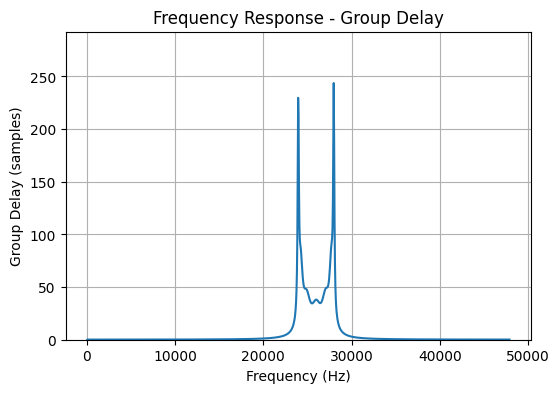

In [35]:
with np.errstate(divide='ignore', invalid='ignore'):  # Mengelola peringatan singularitas
    iir_d.freqz_resp_cas_list([sos_rec_bpf2], mode='groupdelay_s', fs=96000)  # Menghitung dan memplot respons group delay dari filter IIR.
# ylim([-80, 5])  # (Komentar) Batas vertikal plot (tidak digunakan di sini)
grid()  # Menambahkan grid pada plot.